In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from warnings import filterwarnings

In [3]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv(r'C:\Users\alokk\Downloads\insurance.csv', encoding= 'unicode_escape')

In [4]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [6]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [8]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

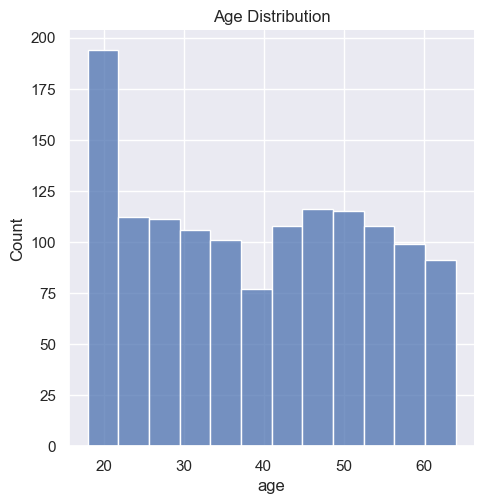

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

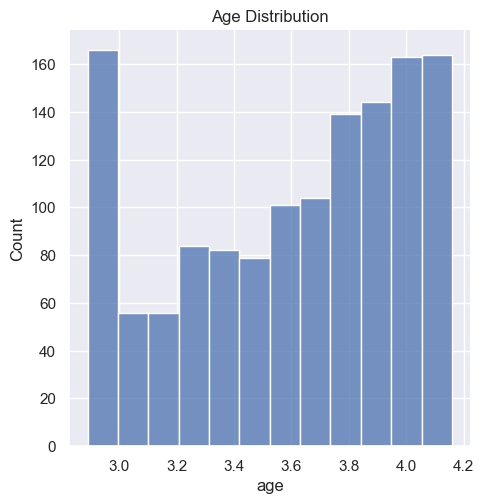

In [34]:
log_age=np.log(insurance_dataset['age'])
plt.figure(figsize=(6,6))
sns.displot(log_age)
plt.title('Age Distribution')
plt.show() 

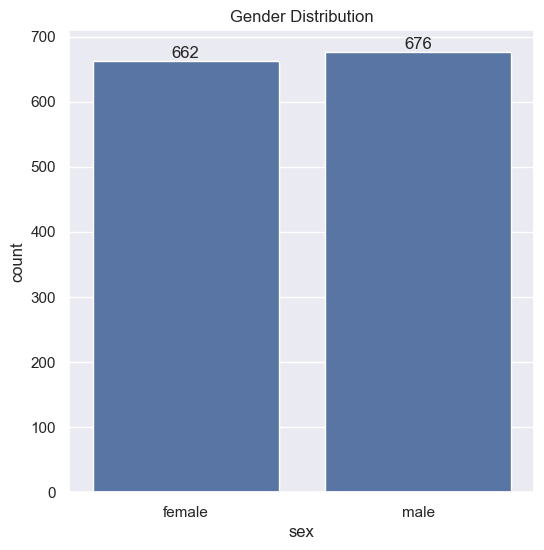

In [19]:
# Gender Distribution
plt.figure(figsize=(6,6))
ax=sns.countplot(x='sex', data=insurance_dataset)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Gender Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

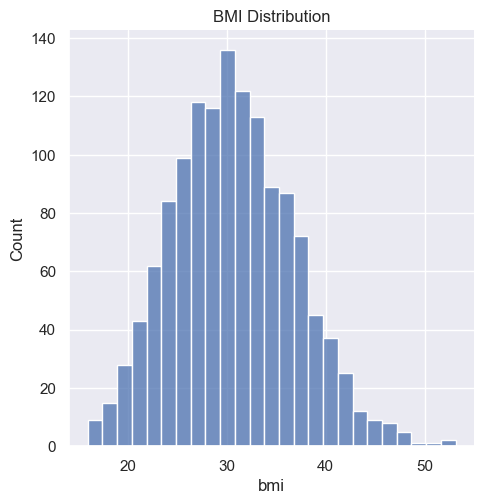

In [12]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

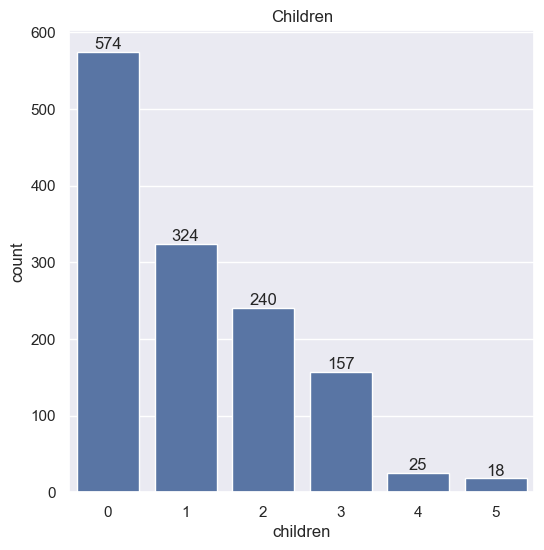

In [20]:
# children column
plt.figure(figsize=(6,6))
ax=sns.countplot(x='children', data=insurance_dataset)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Children')
plt.show()

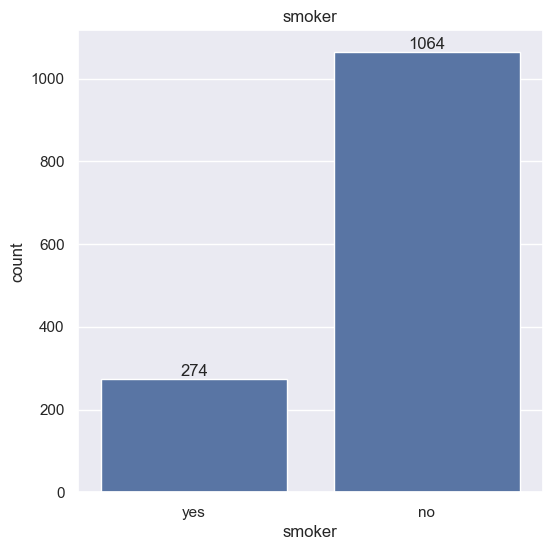

In [21]:
# smoker column
plt.figure(figsize=(6,6))
ax=sns.countplot(x='smoker', data=insurance_dataset)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('smoker')
plt.show()

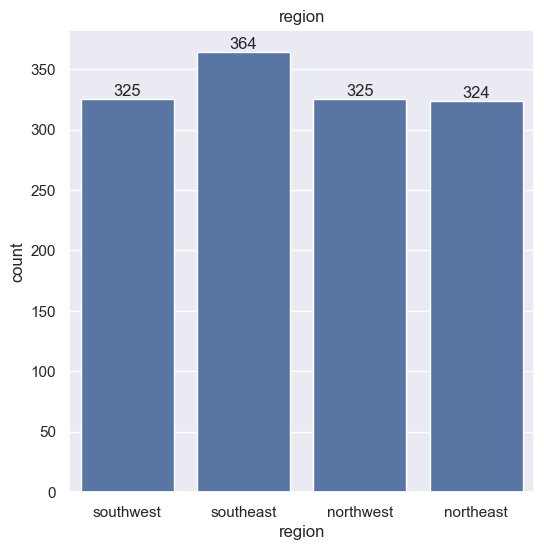

In [22]:
# region column
plt.figure(figsize=(6,6))
ax=sns.countplot(x='region', data=insurance_dataset)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('region')
plt.show()

<Figure size 600x600 with 0 Axes>

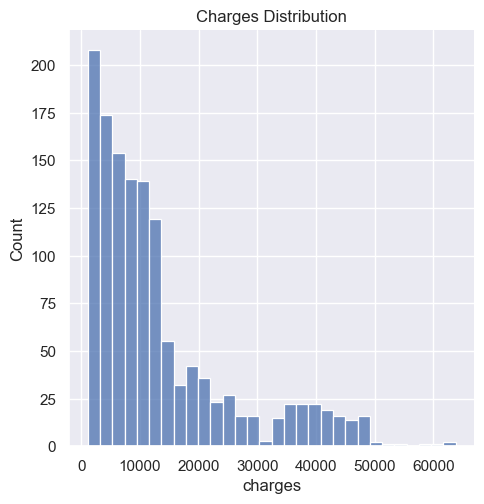

In [19]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre-processing

In [23]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
pd.set_option('future.no_silent_downcasting', True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
pd.set_option('future.no_silent_downcasting', True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
pd.set_option('future.no_silent_downcasting', True)

C:\Users\alokk\AppData\Local\Temp\ipykernel_30436\1955490920.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)


# Splitting the Features and Target

In [25]:
X = insurance_dataset.drop(['charges'], axis=1)
Y = insurance_dataset['charges']

In [26]:
print(X)

      age  sex     bmi  children smoker region
0      19    1  27.900         0      0      1
1      18    0  33.770         1      1      0
2      28    0  33.000         3      1      0
3      33    0  22.705         0      1      3
4      32    0  28.880         0      1      3
...   ...  ...     ...       ...    ...    ...
1333   50    0  30.970         3      1      3
1334   18    1  31.920         0      1      2
1335   18    1  36.850         0      1      0
1336   21    1  25.800         0      1      1
1337   61    1  29.070         0      0      3

[1338 rows x 6 columns]


In [27]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into Training data & Testing Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X_train.shape, X_test.shape)

(1070, 6) (268, 6)


# Model Training

# Linear Regression

In [32]:
# loading the Linear Regression model
regressor = LinearRegression()

In [33]:
regressor.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation

In [34]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [35]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


Building a Predictive System

In [44]:
# changing input_data to a numpy array
input_data = (28,0,33,3,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD ', prediction[0])



[7121.06385743]
The insurance cost is USD  7121.063857428033


C:\Users\alokk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
input_data_as_numpy_array

array([28,  0, 33,  3,  1,  0])

In [41]:
input_data_as_numpy_array.reshape(1,-1)

array([[28,  0, 33,  3,  1,  0]])